In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files


In [ ]:
# Upload 'Cereals.csv' file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("Cereals.csv")
df.head()

Saving Cereals.csv to Cereals (3).csv


name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843

In [ ]:
# ----------------------------------------------------------
# Remove All Cereals with Missing Values
# ----------------------------------------------------------
df_clean = df.dropna().copy()
print("\nData After Dropping Missing Values:")
print(df_clean.head())
print(f"\nRows after cleaning: {len(df_clean)} rows remaining")


Data After Dropping Missing Values:
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
5    Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
5   10.5    10.0    70.0        25      1     1.0  0.75  29.509541  

Rows after cleaning: 74 rows remaining


In [ ]:
# ----------------------------------------------------------
# Select Only Numeric Features and Standardize
# ----------------------------------------------------------
df_numeric = df_clean.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [ ]:
# ----------------------------------------------------------
# Run K-Means Clustering
# ----------------------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
labels_kmeans = kmeans.labels_

# Attach KMeans Cluster labels
df_clean['KMeans_Cluster'] = labels_kmeans

print("\n KMeans Cluster Assignments:")
print(df_clean[['KMeans_Cluster']].head())

print("\n KMeans Cluster Centroids:")
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_numeric.columns)
print(kmeans_centroids)


 KMeans Cluster Assignments:
   KMeans_Cluster
0               2
1               3
2               2
3               2
5               0

 KMeans Cluster Centroids:
   calories   protein       fat    sodium     fiber     carbo    sugars  \
0  0.199162 -0.926249  0.000000  0.075498 -0.666503 -0.595339  1.008898   
1 -0.479532  0.171694 -0.515152 -0.032453 -0.148525  0.634387 -0.878861   
2 -2.216901  1.391180 -0.333333  0.173970  3.666168 -2.086018 -0.794871   
3  1.076051  0.565399  1.058824 -0.060966  0.464670 -0.127917  0.600009   

     potass  vitamins     shelf    weight      cups    rating  
0 -0.726334 -0.183083 -0.549730 -0.202203  0.229015 -0.983650  
1 -0.254374  0.056405 -0.188293 -0.434882  0.286892  0.607885  
2  3.004149 -0.183083  0.948401 -0.202203 -1.857851  2.257956  
3  0.860877  0.148980  0.877223  1.129647 -0.511953 -0.363377  


In [ ]:
# ----------------------------------------------------------
# Apply Hierarchical Clustering
# ----------------------------------------------------------
linkage_single = linkage(df_scaled, method='single')
linkage_complete = linkage(df_scaled, method='complete')

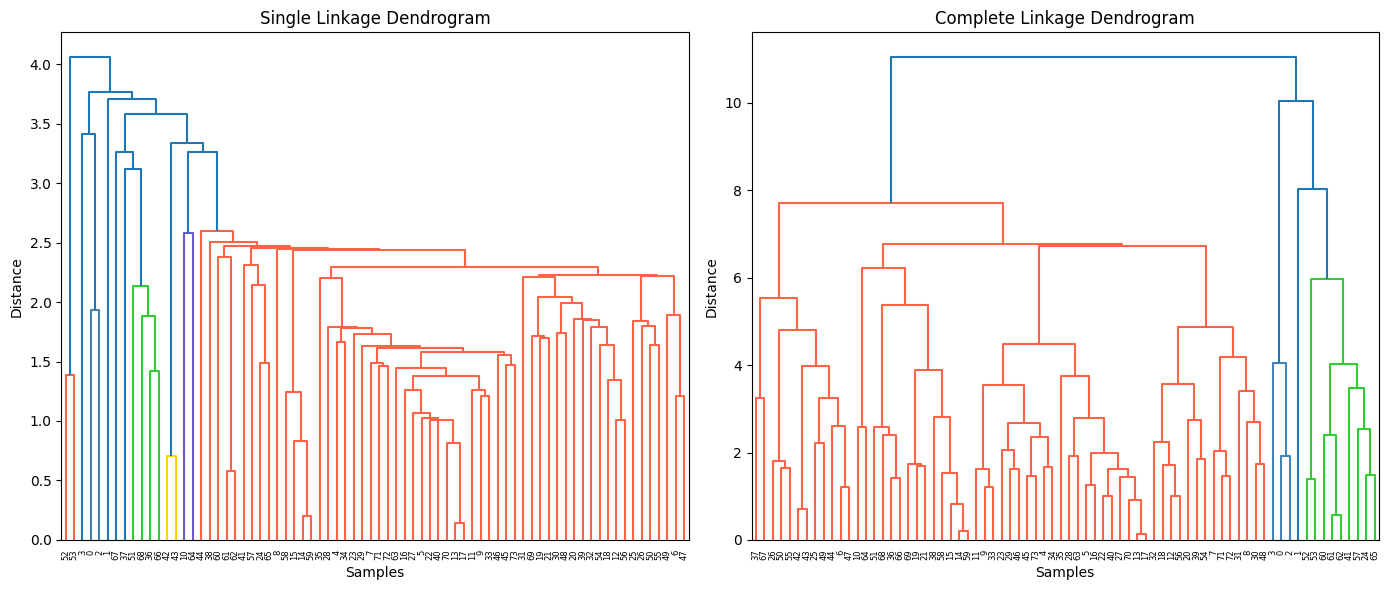

In [ ]:
# ----------------------------------------------------------
# Compare Dendrograms (Single vs Complete Linkage)
# ----------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
dendrogram(linkage_single)
plt.title('Single Linkage Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(linkage_complete)
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------------------------------------
# Analyze Cluster Centroids Again
# ----------------------------------------------------------
# (Already printed after KMeans)
# cluster via Hierarchical:
num_clusters = 4
complete_clusters = fcluster(linkage_complete, num_clusters, criterion='maxclust')
df_clean['CompleteLinkage_Cluster'] = complete_clusters

print("\n Hierarchical Clustering (Complete Linkage) Cluster Assignments:")
print(df_clean[['CompleteLinkage_Cluster']].head())


 Hierarchical Clustering (Complete Linkage) Cluster Assignments:
   CompleteLinkage_Cluster
0                        2
1                        4
2                        2
3                        2
5                        1


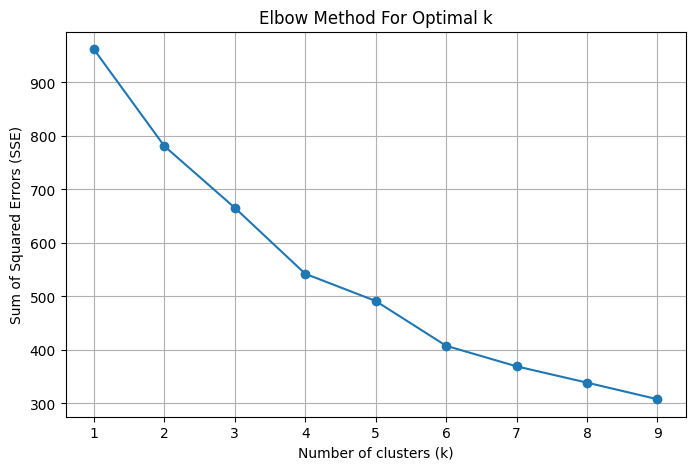

In [ ]:
# ----------------------------------------------------------
# How Many Clusters Would You Use?
# ----------------------------------------------------------
# Elbow method for KMeans (for backup visual)
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


In [1]:
print("""
FINAL ANSWER:
 Based on Elbow Method + Dendrogram visual splits
The best number of clusters to use = 4 clusters.
""")


FINAL ANSWER:
 Based on Elbow Method + Dendrogram visual splits
The best number of clusters to use = 4 clusters.

